In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
lr = LinearRegression(n_jobs=-1)

In [4]:
# import data
data = pd.read_csv('../data/graph_saturation.csv')

In [5]:
data.head()

,moving,n_entry_nodes,n_exit_nodes,n_core_nodes,n_paths,congestion
0,44,4,8,25,35,0.264534
1,4,8,4,15,35,0.088263
2,14,6,7,35,30,0.141675
3,30,5,9,40,5,0.215143
4,44,3,5,10,30,0.464522


In [21]:
transformed = (data.iloc[:,:5] - data.mean(axis=0)[:5])/data.std(axis=0)[:5]

In [22]:
transformed.head()

,moving,n_entry_nodes,n_exit_nodes,n_core_nodes,n_paths
0,1.408537,-0.589462,1.058362,-0.346294,0.816568
1,-1.443330,1.149365,-0.652814,-1.222989,0.816568
2,-0.730363,0.279951,0.630568,0.530400,0.425866
3,0.410384,-0.154756,1.486156,0.968748,-1.527647
4,1.408537,-1.024169,-0.225020,-1.661337,0.425866


In [23]:
x_train = transformed[:400].as_matrix()
x_test = transformed[400:].as_matrix()
y_train = data.congestion[:400].as_matrix()
y_test = data.congestion[400:].as_matrix()

In [24]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [25]:
preds = lr.predict(x_test)

In [26]:
rmse = np.sqrt((preds - y_test)**2)

In [27]:
np.mean(rmse)

0.04563880265155574

In [28]:
mean_absolute_error(y_test, preds)

0.04563880265155574

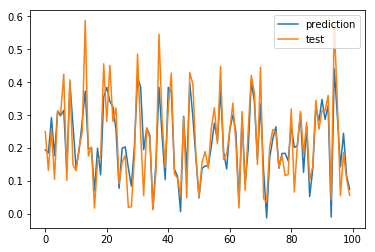

In [29]:
pd.DataFrame({'prediction': preds,'test': y_test}).plot(kind='line')
plt.show()

In [30]:
# import data
data2 = pd.read_csv('../data/graph_saturation_2.csv')

In [31]:
transformed = (data2.iloc[:,:5] - data2.mean(axis=0)[:5])/data2.std(axis=0)[:5]
x_train = transformed[:400].as_matrix()
x_test = transformed[400:].as_matrix()
y_train = data.congestion[:400].as_matrix()
y_test = data.congestion[400:].as_matrix()

In [32]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [33]:
preds = lr.predict(x_test)
mean_absolute_error(y_test, preds)

0.11140122769608642

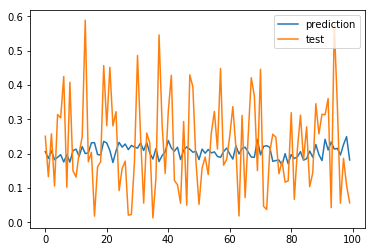

In [34]:
pd.DataFrame({'prediction': preds,'test': y_test}).plot(kind='line')
plt.show()